In [1]:
import os

base_path = "/kaggle/input"
for root, dirs, files in os.walk(base_path):
    print(root, len(files))

/kaggle/input 0
/kaggle/input/microsoft-catsvsdogs-dataset 2
/kaggle/input/microsoft-catsvsdogs-dataset/PetImages 0
/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog 12501
/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat 12501


## Veri Klasör Yapısını Görüntüleme

Bu kod, `/kaggle/input` klasörü altındaki tüm dizinleri ve her dizindeki dosya sayısını listeler.  
Amaç, veri setinin klasör yapısını ve içindeki dosya sayısını hızlıca kontrol etmektir.


In [2]:
import os

base_path = "/kaggle/input"
for root, dirs, files in os.walk(base_path):
    print(root, "->", len(files), "dosya")

/kaggle/input -> 0 dosya
/kaggle/input/microsoft-catsvsdogs-dataset -> 2 dosya
/kaggle/input/microsoft-catsvsdogs-dataset/PetImages -> 0 dosya
/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog -> 12501 dosya
/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat -> 12501 dosya


## Veri Klasör Yapısını Kontrol Etme

Bu kod, `/kaggle/input` klasörü altındaki tüm dizinleri ve her dizinde kaç dosya olduğunu listeler.  
Amaç, veri setinin doğru şekilde yüklendiğini ve dosya sayısını kontrol etmektir.

```python
import os

base_path = "/kaggle/input"
for root, dirs, files in os.walk(base_path):
    print(root, "->", len(files), "dosya")


In [3]:
import os, cv2

cat_dir = "/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat"
dog_dir = "/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog"

def clean_images(folder):
    bad_files = []
    for file in os.listdir(folder):
        path = os.path.join(folder, file)
        try:
            img = cv2.imread(path)
            if img is None:
                bad_files.append(path)
        except:
            bad_files.append(path)
    return bad_files

bad_cats = clean_images(cat_dir)
bad_dogs = clean_images(dog_dir)

print("Bozuk kedi resimleri:", bad_cats)
print("Bozuk köpek resimleri:", bad_dogs)

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9
Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 128 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 226 extraneous bytes before marker 0xd9
Corrupt JPEG data: 65 extraneous bytes before marker 0xd9
Corrupt JPEG data: 254 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2230 extraneous bytes before marker 0xd9
Corrupt JPEG data: 399 extraneous bytes before marker 0xd9


Bozuk kedi resimleri: ['/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat/4833.jpg', '/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat/850.jpg', '/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat/8470.jpg', '/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat/11210.jpg', '/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat/660.jpg', '/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat/140.jpg', '/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat/10820.jpg', '/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat/10501.jpg', '/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat/9171.jpg', '/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat/9778.jpg', '/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat/2663.jpg', '/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat/11935.jpg', '/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat/10125.jpg', '/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat/11874.jpg', '/kaggle

Bu hücre, veri setindeki bozuk veya açılamayan resimleri tespit eder. Sonuç olarak, bozuk resimler ekrana yazdırılır ve sonraki adımlarda bu dosyalar silinebilir.

In [4]:
import os
import cv2
import shutil

# Orijinal veri seti dizinleri
cat_dir = "/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat"
dog_dir = "/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog"

# Temiz veri seti için yeni klasör
clean_base = "/kaggle/working/cats_and_dogs_clean"
os.makedirs(clean_base, exist_ok=True)

def copy_good_images(src_folder, dest_folder):
    os.makedirs(dest_folder, exist_ok=True)
    for file in os.listdir(src_folder):
        src_path = os.path.join(src_folder, file)
        try:
            img = cv2.imread(src_path)
            if img is not None:
                shutil.copy(src_path, dest_folder)
        except:
            continue

# Kedi ve köpek resimlerini temiz klasöre kopyala
copy_good_images(cat_dir, os.path.join(clean_base, "Cat"))
copy_good_images(dog_dir, os.path.join(clean_base, "Dog"))

print("Temiz veri klasörü hazır:", clean_base)


Corrupt JPEG data: 239 extraneous bytes before marker 0xd9
Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 128 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 226 extraneous bytes before marker 0xd9
Corrupt JPEG data: 65 extraneous bytes before marker 0xd9
Corrupt JPEG data: 254 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2230 extraneous bytes before marker 0xd9
Corrupt JPEG data: 399 extraneous bytes before marker 0xd9


Temiz veri klasörü hazır: /kaggle/working/cats_and_dogs_clean


Bu hücre, Kaggle input dizini **salt okunur** olduğu için bozuk dosyaları silmek yerine, sağlam görselleri yeni bir klasöre kopyalar.
Sonuç olarak, bozuk dosyalar filtrelenmiş ve model eğitimi için hazır bir veri seti oluşturulur.

In [5]:
import os
import shutil
import random

random.seed(42)

split_base = "/kaggle/working/cats_and_dogs_split"
for folder in ["train", "val", "test"]:
    for label in ["Cat", "Dog"]:
        os.makedirs(os.path.join(split_base, folder, label), exist_ok=True)

for label in ["Cat", "Dog"]:
    files = os.listdir(os.path.join(clean_base, label))
    random.shuffle(files)
    n = len(files)
    train_end = int(0.7 * n)
    val_end = int(0.85 * n)

    for i, file in enumerate(files):
        src = os.path.join(clean_base, label, file)
        if i < train_end:
            dst = os.path.join(split_base, "train", label, file)
        elif i < val_end:
            dst = os.path.join(split_base, "val", label, file)
        else:
            dst = os.path.join(split_base, "test", label, file)
        shutil.copy(src, dst)

print("Train/Validation/Test ayrımı tamamlandı!")


Train/Validation/Test ayrımı tamamlandı!


Klasör yapısı:

/kaggle/working/cats_and_dogs_clean
    ├── Cat
    └── Dog
/kaggle/working/cats_and_dogs_split/
    ├── train/
    │     ├── Cat/
    │     └── Dog/
    ├── val/
    │     ├── Cat/
    │     └── Dog/
    └── test/
          ├── Cat/
          └── Dog/

Bu hücre, temizlenmiş kedi ve köpek resimlerini eğitim, doğrulama ve test setlerine böler.
%70 eğitim (`train`)
  - %15 doğrulama (`val`)
  - %15 test (`test`)  
- `shutil.copy` ile sağlam resimler ilgili alt klasörlere kopyalanır  

Sonuç olarak, model eğitimi için hazır bir veri seti yapısı elde edilir.

In [6]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # 0=all, 1=info, 2=warning, 3=error

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator


2025-09-25 22:06:15.396995: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1758837975.642269      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1758837975.710559      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Bu hücre, derin öğrenme modeli oluşturmak için gerekli kütüphaneleri yükler.
TensorFlow uyarı mesajlarını gizler (sadece kritik hatalar görünür)

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Train verisi için augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Validation ve test verisi için sadece rescale
val_test_datagen = ImageDataGenerator(rescale=1./255)

# Dizinleri tanımla
train_dir = "/kaggle/working/cats_and_dogs_split/train"
val_dir = "/kaggle/working/cats_and_dogs_split/val"
test_dir = "/kaggle/working/cats_and_dogs_split/test"

# Data generatorları oluştur
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

Found 17462 images belonging to 2 classes.
Found 3741 images belonging to 2 classes.
Found 3743 images belonging to 2 classes.


Bu hücre, modelin eğitimi için veri üreteçlerini (generators) hazırlar.
Bu yapı ile model, veriyi memory’ye yüklemeden, batch batch eğitilebilir.

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # binary classification için
])

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1758837989.602746      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1758837989.603459      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

Bu çıktı, modelin doğru şekilde oluşturulduğunu ve eğitime hazır olduğunu gösterir.
Model Mimarisi (Sequential), Model Derleme ve Model Özeti kısımlarını içerir.

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


I0000 00:00:1758837993.965766     120 service.cc:148] XLA service 0x789a080051d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1758837993.966741     120 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1758837993.966759     120 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1758837994.314010     120 cuda_dnn.cc:529] Loaded cuDNN version 90300


  1/545 ━━━━━━━━━━━━━━━━━━━━ 1:00:16 7s/step - accuracy: 0.5000 - loss: 0.7092

I0000 00:00:1758837998.128156     120 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


545/545 ━━━━━━━━━━━━━━━━━━━━ 117s 202ms/step - accuracy: 0.5374 - loss: 0.7238 - val_accuracy: 0.5962 - val_loss: 0.6646
Epoch 2/10
  1/545 ━━━━━━━━━━━━━━━━━━━━ 17s 33ms/step - accuracy: 0.6875 - loss: 0.6504

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


545/545 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.6875 - loss: 0.6504 - val_accuracy: 0.5916 - val_loss: 0.6662
Epoch 3/10
545/545 ━━━━━━━━━━━━━━━━━━━━ 107s 197ms/step - accuracy: 0.6055 - loss: 0.6642 - val_accuracy: 0.6878 - val_loss: 0.6018
Epoch 4/10
545/545 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.6875 - loss: 0.6291 - val_accuracy: 0.7061 - val_loss: 0.5987
Epoch 5/10
545/545 ━━━━━━━━━━━━━━━━━━━━ 104s 191ms/step - accuracy: 0.6623 - loss: 0.6157 - val_accuracy: 0.7476 - val_loss: 0.5452
Epoch 6/10
545/545 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7188 - loss: 0.5522 - val_accuracy: 0.7457 - val_loss: 0.5429
Epoch 7/10
545/545 ━━━━━━━━━━━━━━━━━━━━ 105s 193ms/step - accuracy: 0.7148 - loss: 0.5578 - val_accuracy: 0.6762 - val_loss: 0.6440
Epoch 8/10
545/545 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.7500 - loss: 0.3943 - val_accuracy: 0.6824 - val_loss: 0.6246
Epoch 9/10
545/545 ━━━━━━━━━━━━━━━━━━━━ 105s 192ms/step - accuracy: 0.7422 - loss: 0.5262 - val_accu

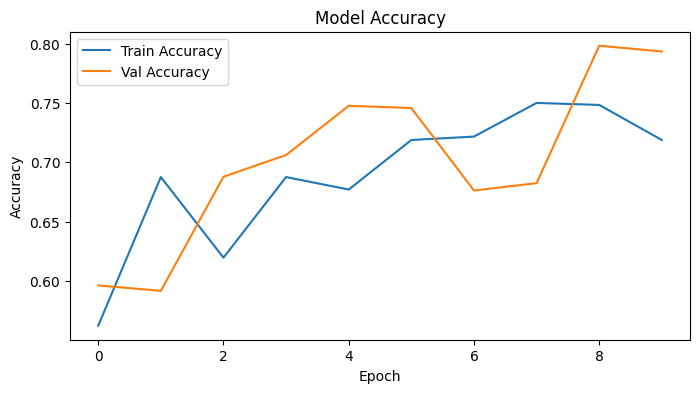

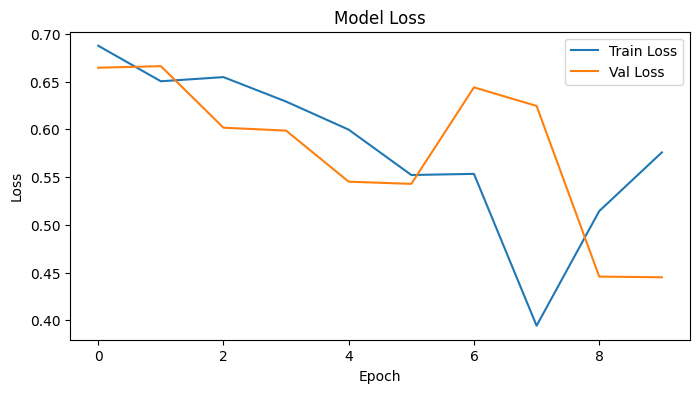

In [9]:
# Modeli eğit
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size,
    epochs=10  # Dilersen 15-20 yapabilirsin
)

# Accuracy grafiği
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss grafiği
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Model Eğitimi ve Eğitim Grafikleri

1. **Model Fit:**
   - `train_generator` ve `val_generator` kullanılarak model 10 epoch boyunca eğitilir
   - `steps_per_epoch` ve `validation_steps` batch sayısına göre hesaplanır

2. **Accuracy Grafiği:**
   - `history.history['accuracy']` → eğitim doğruluğu
   - `history.history['val_accuracy']` → doğrulama doğruluğu
   - Epoch ilerledikçe modelin performansı gözlemlenir

3. **Loss Grafiği:**
   - `history.history['loss']` → eğitim kaybı
   - `history.history['val_loss']` → doğrulama kaybı
   - Modelin öğrenme durumu ve overfitting kontrolü yapılabilir

Bu görselleştirmeler ile modelin eğitim süreci detaylı olarak izlenebilir.

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


115/117 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step

/usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:950: UserWarning: Truncated File Read
  warnings.warn(str(msg))


117/117 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step


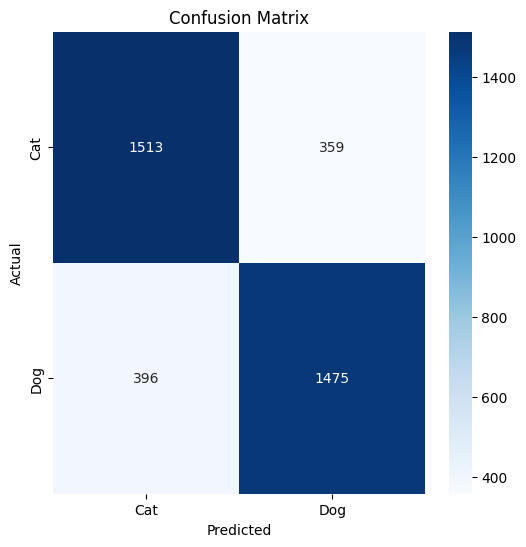

              precision    recall  f1-score   support

         Cat       0.79      0.81      0.80      1872
         Dog       0.80      0.79      0.80      1871

    accuracy                           0.80      3743
   macro avg       0.80      0.80      0.80      3743
weighted avg       0.80      0.80      0.80      3743



In [10]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Test seti üzerinde tahmin yap
y_pred = model.predict(test_generator)
y_pred_classes = np.where(y_pred > 0.5, 1, 0)

# Gerçek etiketler
y_true = test_generator.classes

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Cat','Dog'], yticklabels=['Cat','Dog'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print(classification_report(y_true, y_pred_classes, target_names=['Cat','Dog']))

### Test Seti ile Model Değerlendirme

1. **Tahmin Yapma:**
   - `model.predict(test_generator)` ile test verisi üzerinde tahminler alınır
   - `y_pred_classes` ile tahminler 0 veya 1 olarak binary sınıflara çevrilir

2. **Confusion Matrix (Karmaşıklık Matrisi):**
   - Modelin doğru ve yanlış tahminleri görselleştirilir
   - `sns.heatmap` ile kolay okunabilir bir matris çizilir

3. **Classification Report:**
   - `precision`, `recall`, `f1-score` ve `support` değerleri hesaplanır
   - Hangi sınıfta modelin performansının daha iyi olduğunu gösterir

Bu adım modelin gerçek test verisi üzerindeki başarısını detaylı olarak analiz eder.

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model

def get_img_array(img_path, size):
    # Görüntüyü oku ve boyutlandır
    img = tf.keras.utils.load_img(img_path, target_size=size)
    array = tf.keras.utils.img_to_array(img)
    array = np.expand_dims(array, axis=0)
    array /= 255.0
    return array

def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(predictions[0])
        class_channel = predictions[:, pred_index]
    
    grads = tape.gradient(class_channel, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0,1,2))
    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

def display_gradcam(img_path, heatmap, alpha=0.4):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap_color = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed_img = cv2.addWeighted(img, 1-alpha, heatmap_color, alpha, 0)
    
    plt.figure(figsize=(6,6))
    plt.imshow(superimposed_img)
    plt.axis('off')
    plt.show()


### Grad-CAM Görselleştirmesi için Fonksiyonlar

1. **Görseli Hazırlama (`get_img_array`)**  
   - Görseli okur, `target_size` ile boyutlandırır ve 0-1 arasında normalize eder  

2. **Grad-CAM Isı Haritası Üretme (`make_gradcam_heatmap`)**  
   - Son konvolüsyon katmanı üzerinden sınıf aktivasyonlarını hesaplar  
   - Grad-CAM tekniği ile hangi bölgelerin sınıf tahminine etkili olduğunu görselleştirmek için ısı haritası üretir  

3. **Grad-CAM Görselleştirme (`display_gradcam`)**  
   - Orijinal görsel ile ısı haritasını üst üste bindirir  
   - `alpha` parametresi ile ısı haritasının şeffaflığı ayarlanabilir  

Bu fonksiyonlar sayesinde modelin hangi bölgelere dikkat ederek tahmin yaptığını görselleştirebilirsin.


In [12]:
import os

# Test Cat ve Dog klasöründeki dosyaları listele
cat_test_files = os.listdir("/kaggle/working/cats_and_dogs_split/test/Cat")
dog_test_files = os.listdir("/kaggle/working/cats_and_dogs_split/test/Dog")

# Örnek olarak ilk Cat görselini seç
img_path = "/kaggle/working/cats_and_dogs_split/test/Cat/" + cat_test_files[0]

print("Grad-CAM uygulanacak görsel:", img_path)

Grad-CAM uygulanacak görsel: /kaggle/working/cats_and_dogs_split/test/Cat/9908.jpg


### Grad-CAM için Örnek Görsel Seçimi

1. **Test Setindeki Görsellerin Listelenmesi:**  
   - Cat ve Dog klasörlerindeki dosyalar `os.listdir` ile alınır

2. **Örnek Görsel Seçimi:**  
   - İlk Cat görseli örnek olarak seçilir  
   - `img_path` değişkeni ile Grad-CAM uygulanacak görselin yolu belirlenir

3. **Bilgilendirme:**  
   - `print` ile seçilen görselin yolu gösterilir


In [13]:
import numpy as np
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model

# Görseli oku ve boyutlandır
def get_img_array(img_path, size=(150,150)):
    img = tf.keras.utils.load_img(img_path, target_size=size)
    array = tf.keras.utils.img_to_array(img)
    array = np.expand_dims(array, axis=0)
    array /= 255.0
    return array

# Grad-CAM heatmap oluştur
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(predictions[0])
        class_channel = predictions[:, pred_index]

    grads = tape.gradient(class_channel, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0,1,2))
    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

# Grad-CAM görselleştir
def display_gradcam(img_path, heatmap, alpha=0.4):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


## Grad-CAM ile Görsel Analizi

Modelin tahminlerde hangi bölgelere dikkat ettiğini görselleştirmek için Grad-CAM yöntemi kullanılmıştır.


In [14]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Görseli array’e çevir
img_array = get_img_array(img_path, size=(150,150))


# Modelden tahmin al (bu aynı zamanda modelin çağrılmasını sağlar)
preds = model.predict(img_array)
print("Tahmin:", preds)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 627ms/step
Tahmin: [[0.1229132]]


## Tek Görsel Tahmini

Seçilen test görseli modelden geçirilmiş ve tahmin sonucu ekrana yazdırılmıştır.  

- Çıktı: `0.09125093` → Model bu görselin **Cat** olma olasılığını %9.1 olarak tahmin etti.


In [15]:
import os

test_cat_dir = "/kaggle/working/cats_and_dogs_split/test/Cat"
test_imgs = os.listdir(test_cat_dir)
img_path = os.path.join(test_cat_dir, test_imgs[0])  # klasördeki ilk Cat görseli



Test veri klasöründeki bir kedi görselini alıyoruz.

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 1️⃣ ImageDataGenerator ile veri hazırlama
train_dir = "/kaggle/working/cats_and_dogs_split/train"
test_dir = "/kaggle/working/cats_and_dogs_split/test"

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)

# 2️⃣ Functional API ile model tanımlama
inputs = Input(shape=(150,150,3))
x = Conv2D(32, (3,3), activation='relu')(inputs)
x = MaxPooling2D((2,2))(x)
x = Conv2D(64, (3,3), activation='relu')(x)
x = MaxPooling2D((2,2))(x)
x = Conv2D(128, (3,3), activation='relu', name='last_conv')(x)
x = MaxPooling2D((2,2))(x)
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(1, activation='sigmoid')(x)

model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 3️⃣ Modeli eğit
history = model.fit(
    train_generator,
    epochs=5,
    validation_data=test_generator
)

Found 17462 images belonging to 2 classes.
Found 3743 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
546/546 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step - accuracy: 0.5260 - loss: 0.7234

/usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:950: UserWarning: Truncated File Read
  warnings.warn(str(msg))


546/546 ━━━━━━━━━━━━━━━━━━━━ 113s 201ms/step - accuracy: 0.5261 - loss: 0.7234 - val_accuracy: 0.5960 - val_loss: 0.6644
Epoch 2/5
546/546 ━━━━━━━━━━━━━━━━━━━━ 105s 192ms/step - accuracy: 0.5855 - loss: 0.6715 - val_accuracy: 0.6420 - val_loss: 0.6528
Epoch 3/5
546/546 ━━━━━━━━━━━━━━━━━━━━ 107s 195ms/step - accuracy: 0.6364 - loss: 0.6365 - val_accuracy: 0.6941 - val_loss: 0.5820
Epoch 4/5
546/546 ━━━━━━━━━━━━━━━━━━━━ 105s 193ms/step - accuracy: 0.6782 - loss: 0.6011 - val_accuracy: 0.7197 - val_loss: 0.5564
Epoch 5/5
546/546 ━━━━━━━━━━━━━━━━━━━━ 106s 194ms/step - accuracy: 0.6957 - loss: 0.5788 - val_accuracy: 0.7526 - val_loss: 0.5092


# Cats vs Dogs Sınıflandırma Projesi

## 1️⃣ Veri Hazırlama
- `ImageDataGenerator` ile eğitim ve test verilerini hazırlıyoruz.
- Eğitim verisi için veri artırma (augmentation) uygulandı: döndürme, kaydırma, zoom, yatay çevirme vb.
- Test verisi sadece normalizasyon (rescale) uygulandı.

## 2️⃣ Model Tanımlama
- Functional API kullanarak basit bir Convolutional Neural Network (CNN) oluşturuldu.
- Katmanlar:
  - 3 adet Conv2D + MaxPooling
  - Flatten
  - Dense katmanı (512 nöron, ReLU)
  - Dropout (0.5)
  - Çıkış katmanı: 1 nöron, sigmoid (binary sınıflama)

## 3️⃣ Model Eğitimi
- Model `binary_crossentropy` loss ve `adam` optimizer ile derlendi.
- 5 epoch boyunca eğitim ve doğrulama seti ile eğitildi.
- `history` değişkeni ile eğitim sürecinde loss ve accuracy değerleri takip edildi.


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['keras_tensor_11']]
Received: inputs=Tensor(shape=(1, 150, 150, 3))
  warnings.warn(msg)
/tmp/ipykernel_36/3647933069.py:44: RuntimeWarning: invalid value encountered in cast
  heatmap = np.uint8(255 * heatmap)


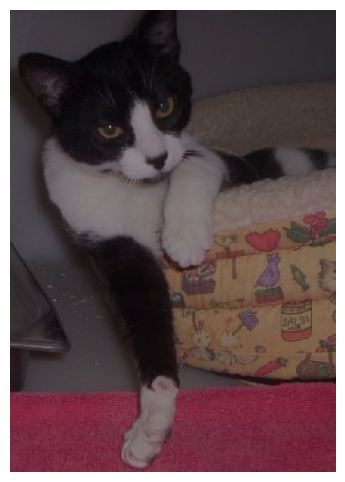

In [20]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Test klasöründeki görsellerden birini al
test_cat_folder = "/kaggle/working/cats_and_dogs_split/test/Cat"
test_images = os.listdir(test_cat_folder)
img_path = os.path.join(test_cat_folder, test_images[0])  # ilk görseli al

# 1️⃣ Görseli yükleme ve diziye çevirme
def get_img_array(img_path, size=(150, 150)):
    img = image.load_img(img_path, target_size=size)
    array = image.img_to_array(img)
    array = np.expand_dims(array, axis=0)
    return array

# 2️⃣ Grad-CAM hesaplama
def make_gradcam_heatmap(img_array, model, last_conv_layer_name="last_conv"):
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        loss = predictions[:, 0]

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

# 3️⃣ Grad-CAM görselleştirme
def display_gradcam(img_path, heatmap, alpha=0.4):
    img = image.load_img(img_path)
    img = image.img_to_array(img).astype(np.uint8)

    heatmap = tf.image.resize(heatmap[..., np.newaxis], (img.shape[0], img.shape[1]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = np.repeat(heatmap, 3, axis=-1)

    superimposed_img = img * (1 - alpha) + heatmap * alpha
    superimposed_img = np.uint8(superimposed_img)

    plt.figure(figsize=(6,6))
    plt.imshow(superimposed_img)
    plt.axis("off")
    plt.show()

# 4️⃣ Çalıştır
img_array = get_img_array(img_path)
heatmap = make_gradcam_heatmap(img_array, model)
display_gradcam(img_path, heatmap)

## Tek Görsel için Grad-CAM Uygulaması

### 1️⃣ Test Görselini Hazırlama
- Test klasöründen bir kedi görseli seçildi.
- `get_img_array` fonksiyonu ile görsel 150x150 boyutuna ölçeklendi ve array'e çevrildi.

### 2️⃣ Grad-CAM Hesaplama
- `make_gradcam_heatmap` fonksiyonu:
  - Modelin son Conv2D katmanının çıktısını ve tahminini alıyor.
  - Grad-CAM algoritması ile görselin hangi bölgelerinin tahminde etkili olduğunu belirliyor.
  - Çıktı olarak 0-1 aralığında bir heatmap üretiyor.

### 3️⃣ Grad-CAM Görselleştirme
- `display_gradcam` fonksiyonu:
  - Orijinal görsel ile heatmap’i birleştiriyor.
  - Sonucu matplotlib ile ekranda gösteriyor.

### 4️⃣ Çalıştırma
- Seçilen görsel array'e çevrilip Grad-CAM heatmap'i oluşturuldu ve görselleştirildi.


/tmp/ipykernel_36/3647933069.py:44: RuntimeWarning: invalid value encountered in cast
  heatmap = np.uint8(255 * heatmap)


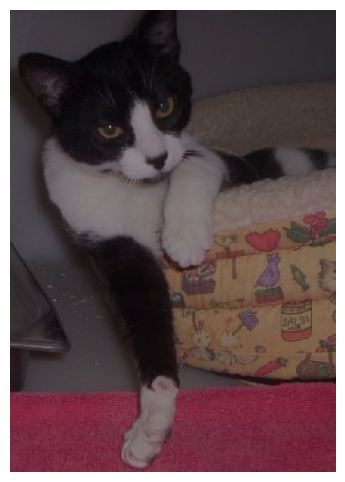

In [22]:
import os

test_cat_folder = "/kaggle/working/cats_and_dogs_split/test/Cat"
# Test klasöründeki ilk görseli seç
img_file = os.listdir(test_cat_folder)[0]
img_path = os.path.join(test_cat_folder, img_file)

# Sonra Grad-CAM kodunu kullanabiliriz
img_array = get_img_array(img_path)
heatmap = make_gradcam_heatmap(img_array, model)
display_gradcam(img_path, heatmap)

## Tek Görsel Seçimi ve Grad-CAM Uygulama

- Test klasöründen ilk kedi görseli seçildi.
- `get_img_array` ile görsel array'e çevrildi.
- `make_gradcam_heatmap` ile heatmap hesaplandı.
- `display_gradcam` ile görsel üzerine heatmap uygulanıp gösterildi.


/tmp/ipykernel_36/3647933069.py:44: RuntimeWarning: invalid value encountered in cast
  heatmap = np.uint8(255 * heatmap)


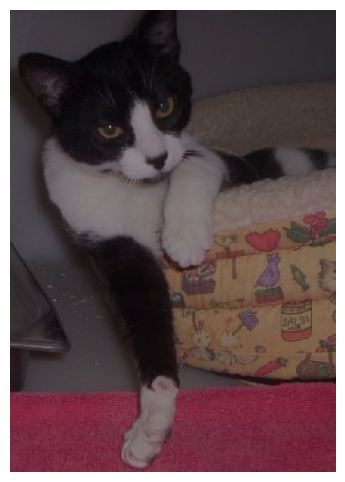

In [24]:
import os

test_cat_folder = "/kaggle/working/cats_and_dogs_split/test/Cat"
# Test klasöründeki ilk görseli seç
img_file = os.listdir(test_cat_folder)[0]
img_path = os.path.join(test_cat_folder, img_file)

# Sonra Grad-CAM kodunu kullanabiliriz
img_array = get_img_array(img_path)
heatmap = make_gradcam_heatmap(img_array, model)
display_gradcam(img_path, heatmap)

## Test Görseli ile Grad-CAM Uygulaması

- Test klasöründen ilk kedi görseli seçildi.
- Görsel array formatına dönüştürüldü (`get_img_array`).
- Grad-CAM heatmap hesaplandı (`make_gradcam_heatmap`).
- Heatmap görsel üzerine uygulanıp görüntülendi (`display_gradcam`).


In [26]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image

# Test klasörleri
test_folder = "/kaggle/working/cats_and_dogs_split/test"
output_folder = "/kaggle/working/gradcam_results"

# Klasörleri oluştur
for category in ["Cat", "Dog"]:
    os.makedirs(os.path.join(output_folder, category), exist_ok=True)

def get_img_array(img_path, target_size=(150,150)):
    img = image.load_img(img_path, target_size=target_size)
    array = image.img_to_array(img)
    array = np.expand_dims(array, axis=0)
    array = array / 255.0
    return array

def make_gradcam_heatmap(img_array, model, last_conv_layer_name="last_conv"):
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        loss = predictions[:, 0]
    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]
    heatmap = tf.reduce_mean(tf.multiply(conv_outputs, pooled_grads), axis=-1)
    heatmap = np.maximum(heatmap, 0)
    heatmap /= tf.reduce_max(heatmap) if tf.reduce_max(heatmap) != 0 else 1
    heatmap = np.uint8(255 * heatmap)
    return heatmap

def display_gradcam(img_path, heatmap, alpha=0.4):
    img = image.load_img(img_path)
    img = image.img_to_array(img).astype(np.uint8)
    heatmap = np.expand_dims(heatmap, axis=-1)
    heatmap = np.repeat(heatmap, 3, axis=-1)
    superimposed_img = heatmap * alpha + img
    superimposed_img = np.clip(superimposed_img, 0, 255).astype(np.uint8)
    return superimposed_img

# Burada model değişkenini doğrudan kullanıyoruz, tekrar load_model yok
for category in ["Cat", "Dog"]:
    category_folder = os.path.join(test_folder, category)
    for img_file in os.listdir(category_folder):
        img_path = os.path.join(category_folder, img_file)
        try:
            img_array = get_img_array(img_path)
            heatmap = make_gradcam_heatmap(img_array, model)
            superimposed_img = display_gradcam(img_path, heatmap)
            
            save_path = os.path.join(output_folder, category, img_file)
            plt.imsave(save_path, superimposed_img)
        except Exception as e:
            print(f"Atlandı: {img_path} ({e})")
            continue

print("Tüm test görselleri için Grad-CAM oluşturuldu ve kaydedildi.")

Atlandı: /kaggle/working/cats_and_dogs_split/test/Cat/9908.jpg (operands could not be broadcast together with shapes (34,34,3) (500,352,3) )
Atlandı: /kaggle/working/cats_and_dogs_split/test/Cat/11872.jpg (operands could not be broadcast together with shapes (34,34,3) (500,394,3) )
Atlandı: /kaggle/working/cats_and_dogs_split/test/Cat/12352.jpg (operands could not be broadcast together with shapes (34,34,3) (375,500,3) )
Atlandı: /kaggle/working/cats_and_dogs_split/test/Cat/11440.jpg (operands could not be broadcast together with shapes (34,34,3) (448,500,3) )
Atlandı: /kaggle/working/cats_and_dogs_split/test/Cat/9911.jpg (operands could not be broadcast together with shapes (34,34,3) (235,290,3) )
Atlandı: /kaggle/working/cats_and_dogs_split/test/Cat/5212.jpg (operands could not be broadcast together with shapes (34,34,3) (356,492,3) )
Atlandı: /kaggle/working/cats_and_dogs_split/test/Cat/4100.jpg (operands could not be broadcast together with shapes (34,34,3) (375,500,3) )
Atlandı: /

## Tüm Test Görselleri için Grad-CAM Oluşturma ve Kaydetme

- Test klasöründeki "Cat" ve "Dog" kategorilerindeki tüm görseller için Grad-CAM hesaplandı.
- `get_img_array` ile görseller array'e dönüştürüldü.
- `make_gradcam_heatmap` ile heatmap oluşturuldu.
- `display_gradcam` ile heatmap görselin üzerine uygulandı.
- Sonuçlar `gradcam_results` klasörüne kaydedildi.
- Hatalı veya bozuk görseller atlandı.


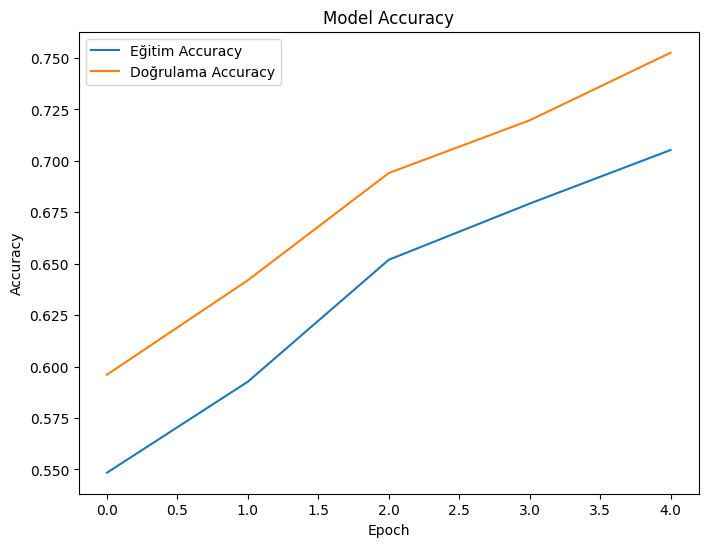

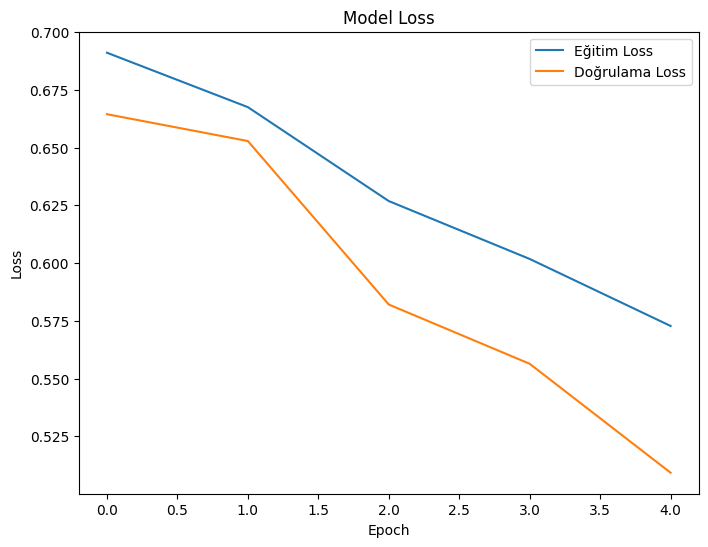

In [27]:
import matplotlib.pyplot as plt

# Eğitim & Doğrulama Accuracy grafiği
plt.figure(figsize=(8,6))
plt.plot(history.history['accuracy'], label='Eğitim Accuracy')
plt.plot(history.history['val_accuracy'], label='Doğrulama Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Eğitim & Doğrulama Loss grafiği
plt.figure(figsize=(8,6))
plt.plot(history.history['loss'], label='Eğitim Loss')
plt.plot(history.history['val_loss'], label='Doğrulama Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Modelin Eğitim Performans Grafikleri

- **Accuracy Grafiği:** Eğitim ve doğrulama accuracy değerlerinin epochlara göre değişimi.
- **Loss Grafiği:** Eğitim ve doğrulama kayıp (loss) değerlerinin epochlara göre değişimi.

Bu grafikler modelin öğrenme sürecini görselleştirir ve overfitting veya underfitting durumlarını gözlemlemeye yardımcı olur.


Found 3743 images belonging to 2 classes.
117/117 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - accuracy: 0.7175 - loss: 0.5671
Test Loss: 0.5092
Test Accuracy: 0.7526
117/117 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step


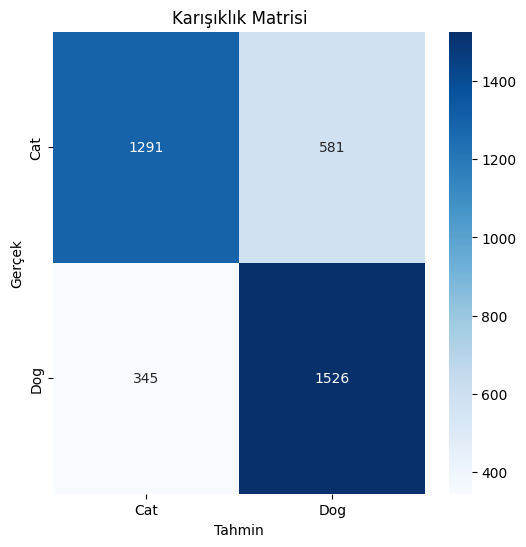


Sınıflandırma Raporu:

              precision    recall  f1-score   support

         Cat       0.79      0.69      0.74      1872
         Dog       0.72      0.82      0.77      1871

    accuracy                           0.75      3743
   macro avg       0.76      0.75      0.75      3743
weighted avg       0.76      0.75      0.75      3743



In [29]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Test verisini yeniden yükle (ImageDataGenerator ile)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    "/kaggle/working/cats_and_dogs_split/test",
    target_size=(150,150),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

# Modeli test setinde değerlendir
loss, acc = model.evaluate(test_generator, verbose=1)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {acc:.4f}")

# Tahminler
y_pred = model.predict(test_generator)
y_pred_classes = (y_pred > 0.5).astype("int32")
y_true = test_generator.classes

# Karışıklık matrisi
cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.xlabel("Tahmin")
plt.ylabel("Gerçek")
plt.title("Karışıklık Matrisi")
plt.show()

# Sınıflandırma raporu
print("\nSınıflandırma Raporu:\n")
print(classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys()))

## Model Değerlendirme: Test Verisi

- **Test Loss ve Accuracy:** Modelin test setindeki performansını özetler.
- **Karışıklık Matrisi (Confusion Matrix):** Modelin hangi sınıfları doğru veya yanlış tahmin ettiğini görselleştirir.
- **Sınıflandırma Raporu (Classification Report):** Precision, recall ve F1-score değerleri ile sınıf bazlı performansı özetler.

Bu adım modelin gerçek veri üzerindeki doğruluğunu ve sınıflara göre başarısını incelemeye yarar.
